<a href="https://colab.research.google.com/github/pranavvb03/lung-cancer-prediction/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os
from skimage import io
from skimage.color import rgb2gray
import plotly.express as px
import random
from sklearn.utils import shuffle
import shutil
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers
from keras.applications import resnet

In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import models, layers, regularizers
import cv2
import numpy as np
from sklearn.metrics import accuracy_score
from collections import Counter

In [ ]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/archive.zip or
        /content/archive.zip.zip, and cannot find /content/archive.zip.ZIP, period.


In [ ]:
ROOT_path = '/content/Data'
train_path = '/content/Data/train'
valid_path = '/content/Data/valid'
test_path = '/content/Data/test'

In [ ]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
    plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(img_files):
        plt.subplot(1, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img, cmap='gray')

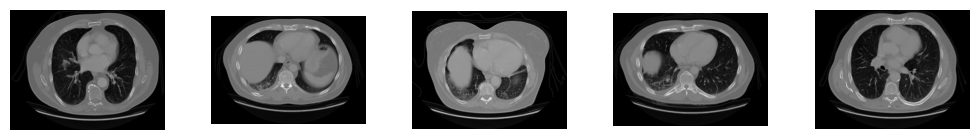

In [ ]:
plot_images('/content/Data/test/adenocarcinoma', top=10)

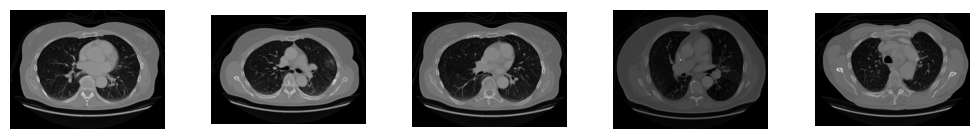

In [ ]:
plot_images('/content/Data/test/large.cell.carcinoma', top=10)

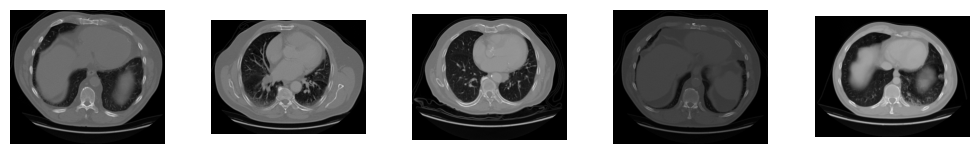

In [ ]:
plot_images('/content/Data/test/squamous.cell.carcinoma')

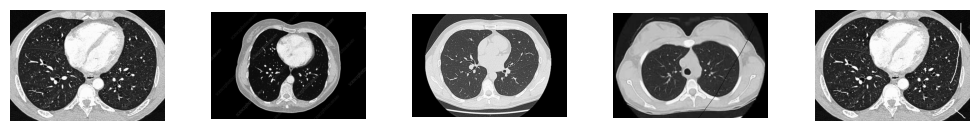

In [ ]:
plot_images('/content/Data/test/normal')

In [ ]:
batch_size = 34
target_size = (256,256)

train_datagen = ImageDataGenerator(rescale=1./255.0)
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

val_generator = val_datagen.flow_from_directory(
        valid_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=target_size,
        batch_size=315,
        class_mode='categorical',
        shuffle=True)

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [ ]:
input_shape = (256,256,3)
num_classes =4

In [ ]:
import tensorflow as tf
res_model=tf.keras.applications.ConvNeXtSmall(include_top=False,
                         pooling='avg',
                         weights='imagenet',
                         input_shape = (input_shape))

model = models.Sequential()

model.add(res_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

198551472/198551472 [==============================] - 10s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convnext_small (Functional  (None, 768)               49454688  
 )                                                               
                                                                 
 dropout (Dropout)           (None, 768)               0         
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 batch_normalization (Batch  (None, 768)               3072      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 512)               393728    
                                                      

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import os
main_dir="/content/Data"
train_data=ImageDataGenerator(rescale=1./255)
test_data=ImageDataGenerator(rescale=1./255)
valid_data=ImageDataGenerator(rescale=1./255)

train_dir=os.path.join(main_dir ,'train')
train_set = train_data.flow_from_directory(train_dir,target_size=(460,460),batch_size=32,class_mode='categorical')

test_dir=os.path.join(main_dir ,'test')
test_set = test_data.flow_from_directory(test_dir,target_size=(460,460),batch_size=32,class_mode='categorical')

valid_dir=os.path.join(main_dir ,'valid')
valid_set = test_data.flow_from_directory(valid_dir,target_size=(460,460),batch_size=32,class_mode='categorical')

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50V2
from keras.models import *
from keras.layers import *
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
base_model=ResNet50V2(include_top=False , weights='imagenet')
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512 ,activation='relu')(x)
x=Dense(128 ,activation='relu')(x)
predictions=Dense(4 ,activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=['accuracy'])

94668760/94668760 [==============================] - 6s 0us/step


In [ ]:
results=model.fit(train_set ,epochs=10,validation_data=[valid_set],verbose=1)

Epoch 1/10
20/20 [==============================] - 29s 651ms/step - loss: 1.1779 - accuracy: 0.4600 - val_loss: 0.8041 - val_accuracy: 0.6806
Epoch 2/10
20/20 [==============================] - 9s 442ms/step - loss: 0.6645 - accuracy: 0.7520 - val_loss: 0.8635 - val_accuracy: 0.5833
Epoch 3/10
20/20 [==============================] - 10s 499ms/step - loss: 0.4957 - accuracy: 0.8042 - val_loss: 0.9871 - val_accuracy: 0.5694
Epoch 4/10
20/20 [==============================] - 9s 418ms/step - loss: 0.4539 - accuracy: 0.8238 - val_loss: 0.6922 - val_accuracy: 0.6528
Epoch 5/10
20/20 [==============================] - 9s 440ms/step - loss: 0.2447 - accuracy: 0.9347 - val_loss: 0.4562 - val_accuracy: 0.7778
Epoch 6/10
20/20 [==============================] - 9s 438ms/step - loss: 0.1924 - accuracy: 0.9380 - val_loss: 0.7148 - val_accuracy: 0.7083
Epoch 7/10
20/20 [==============================] - 9s 453ms/step - loss: 0.2240 - accuracy: 0.9103 - val_loss: 0.5401 - val_accuracy: 0.7639
Epoc

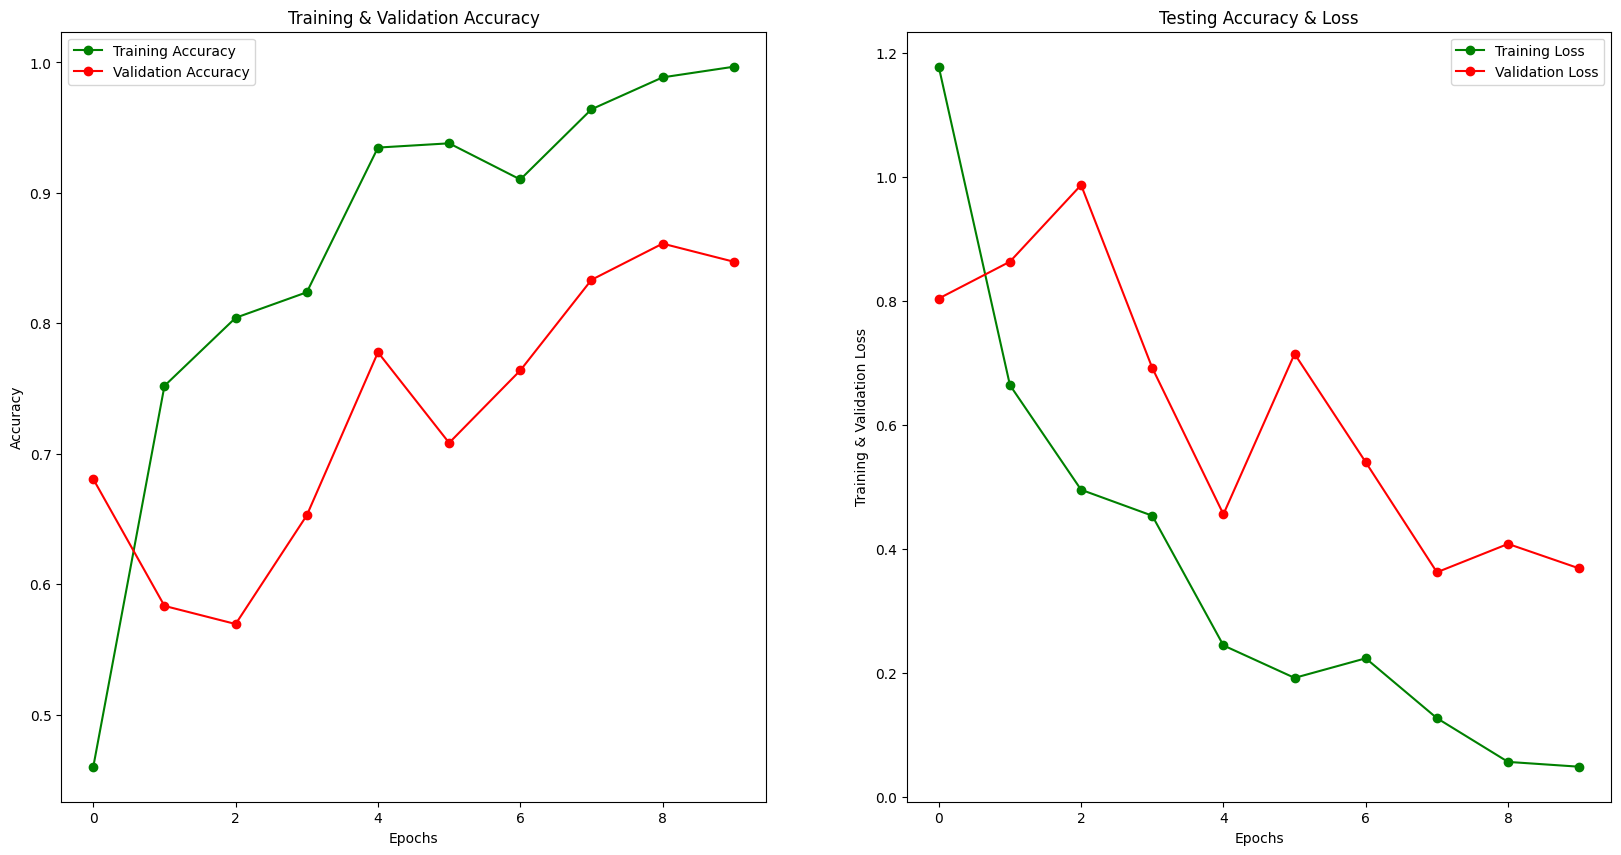

In [ ]:
history=results
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
epochs = 20

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    verbose=1
)
test = test_generator
score = model.evaluate(test, verbose = 1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/20
19/19 [==============================] - 4s 227ms/step - loss: 0.0038 - accuracy: 0.9984 - val_loss: 0.6841 - val_accuracy: 0.7778
Epoch 2/20
19/19 [==============================] - 4s 219ms/step - loss: 0.0051 - accuracy: 0.9967 - val_loss: 0.7912 - val_accuracy: 0.7639
Epoch 3/20
19/19 [==============================] - 5s 251ms/step - loss: 0.0056 - accuracy: 0.9967 - val_loss: 0.6877 - val_accuracy: 0.7778
Epoch 4/20
19/19 [==============================] - 4s 207ms/step - loss: 0.0031 - accuracy: 0.9984 - val_loss: 0.6927 - val_accuracy: 0.7778
Epoch 5/20
19/19 [==============================] - 5s 241ms/step - loss: 0.0043 - accuracy: 0.9967 - val_loss: 0.6992 - val_accuracy: 0.7500
Epoch 6/20
19/19 [==============================] - 4s 213ms/step - loss: 0.0033 - accuracy: 0.9984 - val_loss: 0.6893 - val_accuracy: 0.7778
Epoch 7/20
19/19 [==============================] - 4s 213ms/step - loss: 0.0032 - accuracy: 0.9984 - val_loss: 0.7091 - val_accuracy: 0.7778
Epoch 

In [ ]:
confusion_matrix(true_labels, predicted_labels)

array([[42, 28, 25, 25],
       [22,  9,  8, 12],
       [26, 12,  6, 10],
       [34, 16, 12, 28]])

In [ ]:
num_test_samples = len(test_generator)
num_classes = len(test_generator.class_indices)
from sklearn.metrics import classification_report
predicted_probabilities = model.predict(test_generator, steps=num_test_samples)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

true_labels = test_generator.classes

report = classification_report(true_labels, predicted_labels)

print(report)

1/1 [==============================] - 3s 3s/step
              precision    recall  f1-score   support

           0       0.41      0.43      0.42       120
           1       0.15      0.06      0.08        51
           2       0.21      0.09      0.13        54
           3       0.26      0.42      0.32        90

    accuracy                           0.31       315
   macro avg       0.26      0.25      0.24       315
weighted avg       0.29      0.31      0.29       315



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

class_labels = ['Adenocarcinoma', 'Large cell carcinoma', 'Squamous cell carcinoma', 'Normal']

test_image_path = '/content/Data/test/squamous.cell.carcinoma/000108 (6).png'
test_image = image.load_img(test_image_path, target_size=(150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)


test_image = test_image / 255.0

predictions = model.predict(test_image)
predicted_class = np.argmax(predictions)

print(f'Predicted Class: {class_labels[predicted_class]}')

1/1 [==============================] - 2s 2s/step
Predicted Class: Normal


In [ ]:
train_path = '/content/Data/train'
test_path = '/content/Data/test'

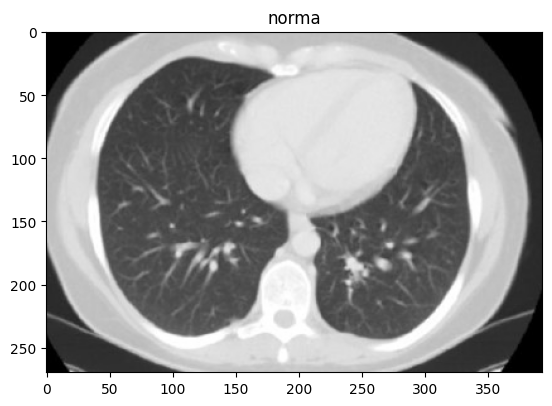

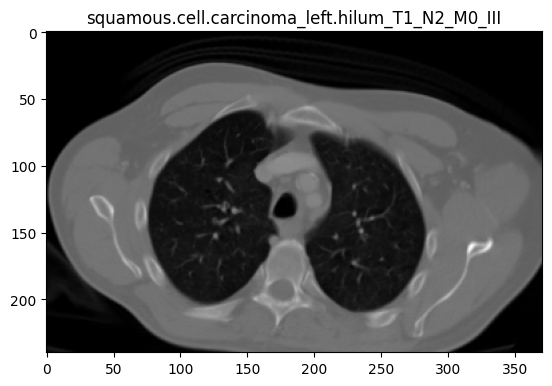

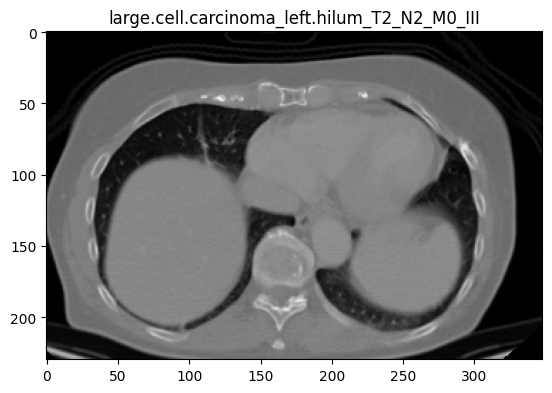

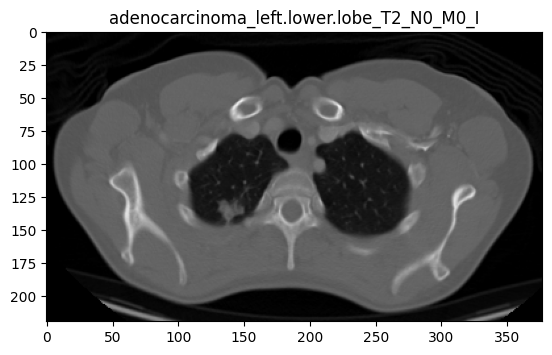

In [ ]:
from matplotlib import image as mpimg
import os
for link in os.listdir(train_path):
  lk=train_path+'/'+link
  for lk1 in os.listdir(lk+'/'):
    path=lk+'/'+lk1
    img=mpimg.imread(path)
    plt.imshow(img)
    plt.title(link[:-1])
    plt.show()
    break

In [ ]:
image_shape = (460,460,3)
N_CLASSES = 4
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=vgg19.preprocess_input)
train_generator = train_datagen.flow_from_directory(train_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=vgg19.preprocess_input)
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

test_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=vgg19.preprocess_input)
test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

In [ ]:
from keras.applications.vgg19 import VGG19,preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
vgg19_model = VGG19(include_top=False, pooling='avg', weights='imagenet', input_shape = (image_shape))
for layer in vgg19_model.layers:
    layer.trainable = False

80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
model = Sequential()
model.add(vgg19_model)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(N_CLASSES, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 4)                 2052      
                                                                 
Total params: 20028484 (76.40 MB)
Trainable params: 3076 (12.02 KB)
Non-trainable params: 20025408 (76.39 MB)
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate= 0.00001, decay= 1e-6)
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
 !pip install kaggle
 !mkdir ~/.kaggle
 !cp kaggle.json ~/.kaggle/
 !chmod 600 ~/.kaggle/kaggle.json
 !kaggle datasets download -d mohamedhanyyy/chest-ctscan-images

 99% 118M/119M [00:07<00:00, 19.2MB/s]
100% 119M/119M [00:07<00:00, 16.7MB/s]


In [ ]:
!unzip /content/chest-ctscan-images.zip

Archive:  /content/chest-ctscan-images.zip
  inflating: Data/test/adenocarcinoma/000108 (3).png  
  inflating: Data/test/adenocarcinoma/000109 (2).png  
  inflating: Data/test/adenocarcinoma/000109 (4).png  
  inflating: Data/test/adenocarcinoma/000109 (5).png  
  inflating: Data/test/adenocarcinoma/000112 (2).png  
  inflating: Data/test/adenocarcinoma/000113 (7).png  
  inflating: Data/test/adenocarcinoma/000114 (5).png  
  inflating: Data/test/adenocarcinoma/000114.png  
  inflating: Data/test/adenocarcinoma/000115 (4).png  
  inflating: Data/test/adenocarcinoma/000115 (8).png  
  inflating: Data/test/adenocarcinoma/000115.png  
  inflating: Data/test/adenocarcinoma/000116 (5).png  
  inflating: Data/test/adenocarcinoma/000116 (7).png  
  inflating: Data/test/adenocarcinoma/000116 (9).png  
  inflating: Data/test/adenocarcinoma/000117 (4).png  
  inflating: Data/test/adenocarcinoma/000117 (8).png  
  inflating: Data/test/adenocarcinoma/000117.png  
  inflating: Data/test/adenocarcin

In [ ]:
from IPython.display import clear_output
!git clone https://github.com/matterport/Mask_RCNN.git
!pip install pycocotools

!rm -rf Mask_RCNN/.git/

clear_output()

In [ ]:
import os
import sys
from tqdm import tqdm
import cv2
import numpy as np
import json
import skimage.draw
import matplotlib
import matplotlib.pyplot as plt
import random
import keras.layers as KL

ROOT_DIR = os.path.abspath('Mask_RCNN/')
# Import Mask RCNN
sys.path.append(ROOT_DIR)
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, 'samples/coco/'))
import coco

plt.rcParams['figure.facecolor'] = 'white'

clear_output()

In [ ]:
def get_ax(rows=1, cols=1, size=7):

    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [ ]:
class TumorConfig(Config):

    # Give the configuration a recognizable name
    NAME = 'tumor_detector'
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 1
    DETECTION_MIN_CONFIDENCE = 0.85
    STEPS_PER_EPOCH = 100
    LEARNING_RATE = 0.001

config = TumorConfig()
config.display()



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.85
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE        

In [ ]:
DATASET_DIR = '/content/Data'
class LungScanDataset(utils.Dataset):

    def load_lung_scan(self, dataset_dir, subset):

        self.add_class("tumor", 1, "tumor")

        assert subset in ["train", "val", 'test']
        dataset_dir = os.path.join(dataset_dir, subset)

        annotations = json.load(open(os.path.join(DATASET_DIR, subset, 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib')))
        annotations = list(annotations.values())


        annotations = [a for a in annotations if a['regions']]

        for a in annotations:

            if type(a['regions']) is dict:
                polygons = [r['shape_attributes'] for r in a['regions'].values()]
            else:
                polygons = [r['shape_attributes'] for r in a['regions']]


            image_path = os.path.join(dataset_dir, a['filename'])
            image = skimage.io.imread(image_path)
            height, width = image.shape[:2]

            self.add_image(
                "tumor",
                image_id=a['filename'],
                path=image_path,
                width=width,
                height=height,
                polygons=polygons
            )

    def load_mask(self, image_id):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """

        image_info = self.image_info[image_id]
        if image_info["source"] != "tumor":
            return super(self.__class__, self).load_mask(image_id)

        info = self.image_info[image_id]
        mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                        dtype=np.uint8)
        for i, p in enumerate(info["polygons"]):
            rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])
            mask[rr, cc, i] = 1


        return mask.astype(np.bool), np.ones([mask.shape[-1]], dtype=np.int32)

    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "tumor":
            return info["path"]
        else:
            super(self.__class__, self).image_reference(image_id)

In [ ]:
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')
os.environ['DISPLAY']=':1.0'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [ ]:

model.save("model.h5")
print("Saved model")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved model


In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import tensorflow as tf
import numpy as np
import matplotlib
matplotlib.use('Agg')
# Load your trained model (replace 'model_path' with the actual path to your model)
model_path = '/content/model.h5'
model = tf.keras.models.load_model(model_path)

# Map class labels to human-readable names
class_labels = {
    0: 'Adenocarcinoma',
    1: 'Large Cell Carcinoma',
    2: 'Normal',
    3: 'Squamous Cell Carcinoma'
}

# Function to load and classify an image
def classify_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        image = Image.open(file_path).resize((256,256))  # Resize image as per model requirements
        image = np.array(image) / 255.0  # Normalize image
        image = image.reshape(1, 256,256, 3)  # Reshape for model input
        prediction = model.predict(image)
        class_index = np.argmax(prediction)
        result_label.config(text=f'Class: {class_labels[class_index]}')

# Create a Tkinter window
root = tk.Tk()
root.title('Lung Cancer Detection App')

# Create a label to display classification result
result_label = tk.Label(root, text='')
result_label.pack(pady=10)

# Create a button to open an image
classify_button = tk.Button(root, text='Classify Image', command=classify_image)
classify_button.pack(pady=10)

# Run the Tkinter main loop
root.mainloop()
